# Data Preparation

In [1]:
# loading the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset

df = pd.read_csv("crop_data_with_micro_nutrients.csv")

In [3]:
df.head(10)

,Unnamed: 0,N,P,K,ph,crop,Mb,Fe,Zn,B
0,0,358.73,12.85,176.25,5.62,arecanut,1.359691,182.177302,1.371113,1.093460
1,1,395.28,16.40,188.32,6.11,arecanut,1.406700,63.211008,1.573542,0.979546
2,2,361.19,11.33,151.52,5.68,arecanut,0.268580,128.528975,1.623245,1.189006
3,3,425.39,19.27,215.04,6.25,arecanut,1.387200,116.202098,1.024794,1.806096
4,4,371.52,17.73,147.99,5.96,arecanut,0.637349,35.445027,1.881881,1.381623
5,5,351.50,13.08,211.84,5.59,arecanut,0.608032,84.458273,1.716157,0.855946
6,6,288.96,10.99,196.50,5.68,arecanut,0.173988,160.255550,0.785690,1.134318
7,7,388.96,18.77,234.52,5.73,arecanut,0.565601,97.569841,0.799546,1.992515
8,8,347.69,17.89,167.72,5.81,arecanut,1.444337,113.847679,1.056013,1.502312
9,9,388.51,19.14,198.45,5.92,arecanut,1.683339,30.877617,1.876873,1.470339


# Data pre processing

In [3]:
df.head()

,Unnamed: 0,N,P,K,ph,crop,Mb,Fe,Zn,B
0,0,358.73,12.85,176.25,5.62,arecanut,1.359691,182.177302,1.371113,1.093460
1,1,395.28,16.40,188.32,6.11,arecanut,1.406700,63.211008,1.573542,0.979546
2,2,361.19,11.33,151.52,5.68,arecanut,0.268580,128.528975,1.623245,1.189006
3,3,425.39,19.27,215.04,6.25,arecanut,1.387200,116.202098,1.024794,1.806096
4,4,371.52,17.73,147.99,5.96,arecanut,0.637349,35.445027,1.881881,1.381623


In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.describe()

,N,P,K,ph,Mb,Fe,Zn,B
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,308.783445,21.927479,220.217479,5.382941,1.468095,101.146160,1.268572,1.377988
std,76.628734,6.474879,144.426957,0.474376,0.722544,53.231580,0.478375,0.411714
min,125.400000,10.990000,115.850000,4.350000,0.173988,20.895551,0.502516,0.509163
25%,262.465000,17.810000,166.055000,4.915000,0.911034,57.391018,0.836880,1.062057
50%,313.660000,21.250000,208.320000,5.460000,1.435876,94.619934,1.238629,1.450960
75%,355.515000,24.410000,245.930000,5.750000,1.967486,146.756862,1.698419,1.714361
max,544.260000,48.730000,1693.890000,6.480000,2.994479,197.453387,2.283417,1.999495


In [6]:
df.shape

(119, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       119 non-null    float64
 1   P       119 non-null    float64
 2   K       119 non-null    float64
 3   ph      119 non-null    float64
 4   crop    119 non-null    object 
 5   Mb      119 non-null    float64
 6   Fe      119 non-null    float64
 7   Zn      119 non-null    float64
 8   B       119 non-null    float64
dtypes: float64(8), object(1)
memory usage: 8.5+ KB


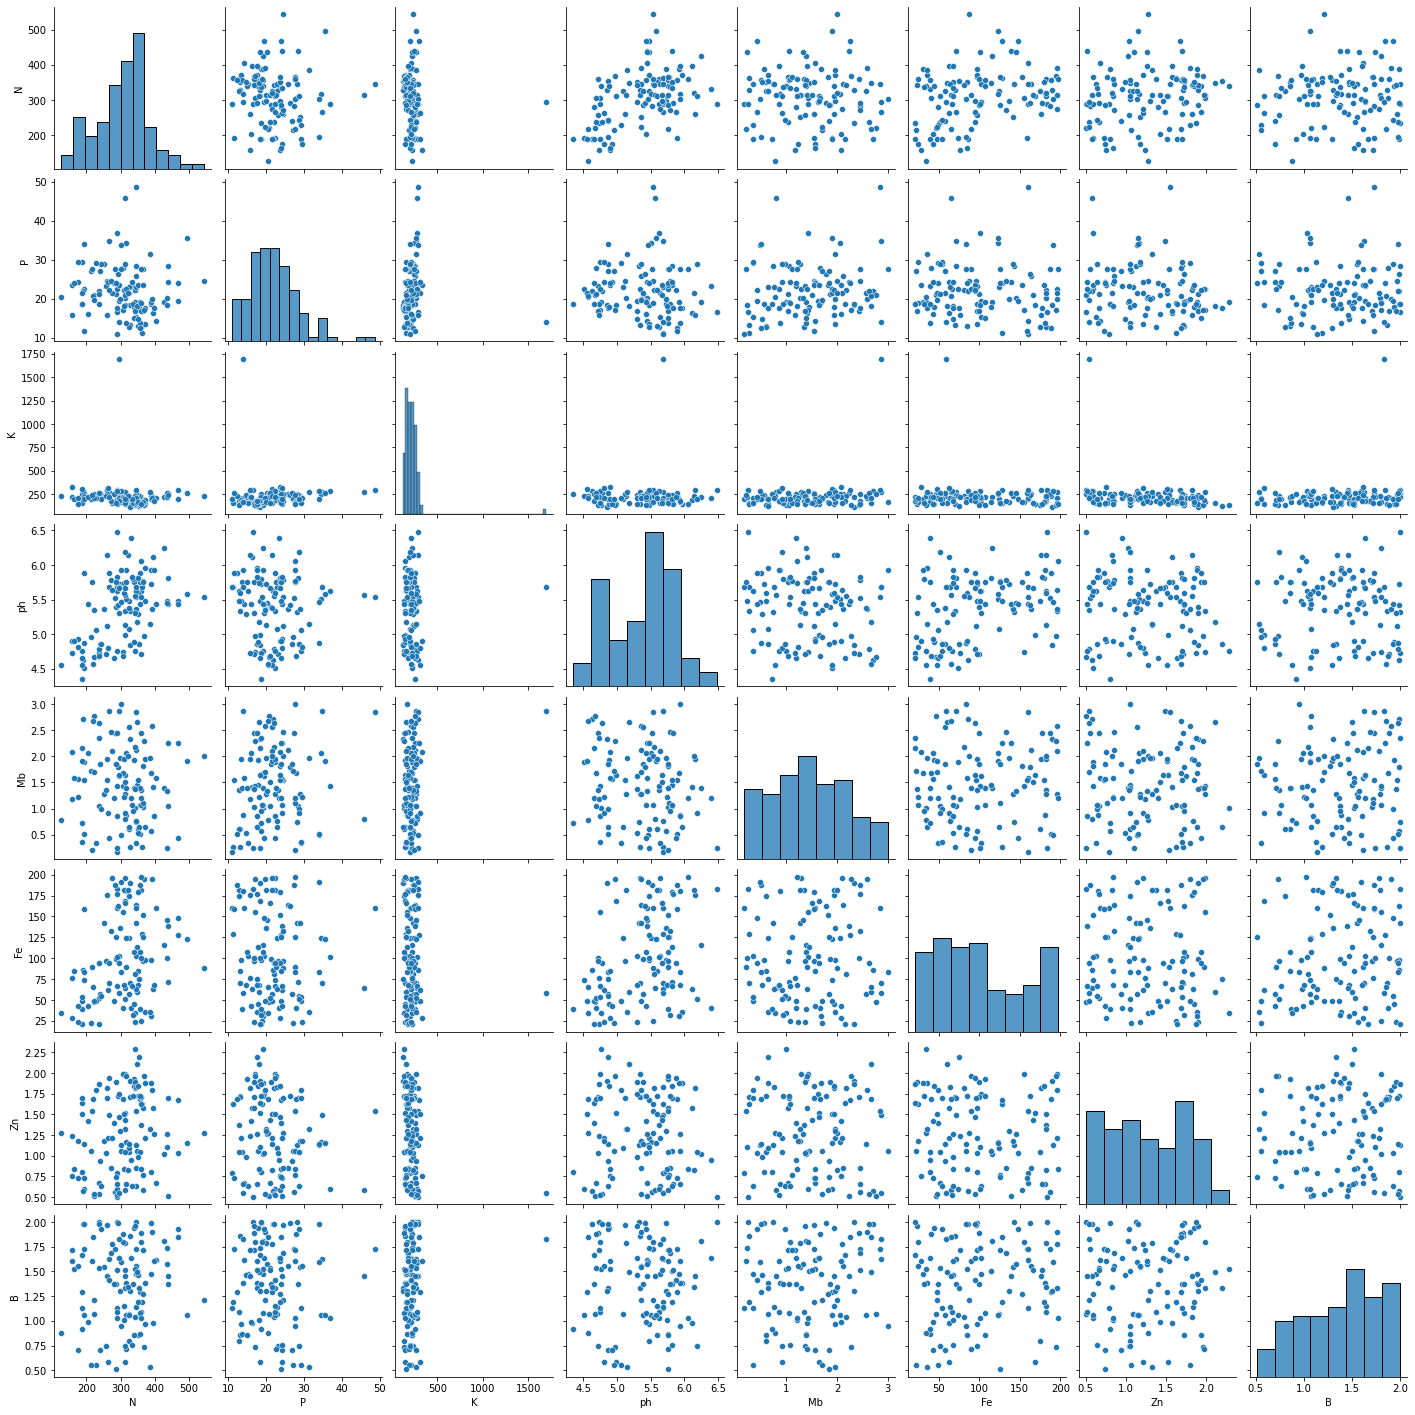

In [8]:
sns.pairplot(df)

In [5]:
from sklearn import preprocessing 
 
label_encoder = preprocessing.LabelEncoder() 
df['crop']= label_encoder.fit_transform(df['crop'])
df.head()

,Unnamed: 0,N,P,K,ph,crop,Mb,Fe,Zn,B
0,0,358.73,12.85,176.25,5.62,0,1.359691,182.177302,1.371113,1.093460
1,1,395.28,16.40,188.32,6.11,0,1.406700,63.211008,1.573542,0.979546
2,2,361.19,11.33,151.52,5.68,0,0.268580,128.528975,1.623245,1.189006
3,3,425.39,19.27,215.04,6.25,0,1.387200,116.202098,1.024794,1.806096
4,4,371.52,17.73,147.99,5.96,0,0.637349,35.445027,1.881881,1.381623


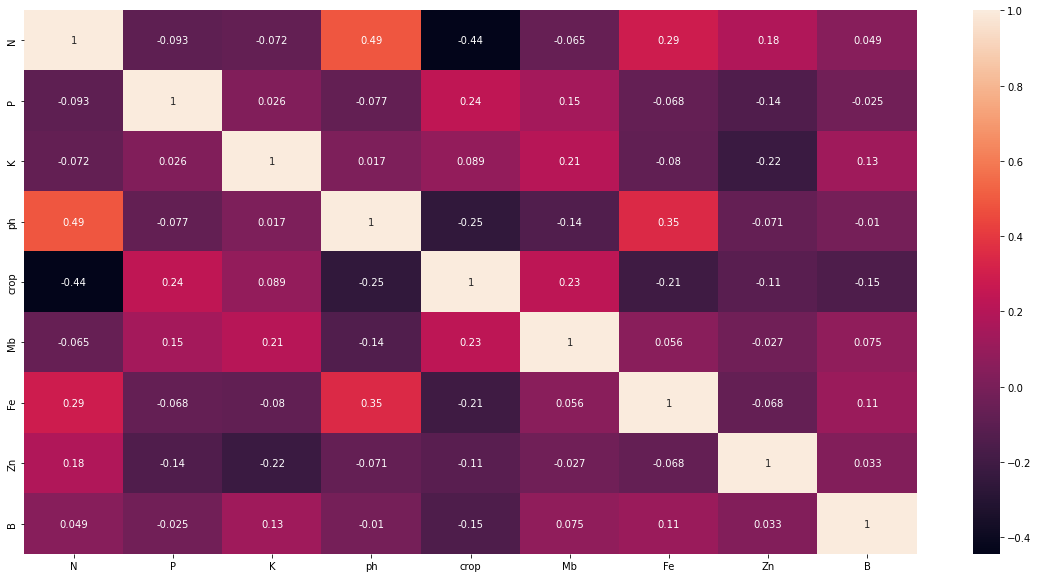

In [10]:
com=df.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(com,annot=True)

In [11]:
x = df.drop(['crop'],axis=1)
y = df['crop']

In [12]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [13]:
x_train.shape, y_train.shape

((83, 8), (83,))

In [14]:
x_test.shape,y_test.shape

((36, 8), (36,))

In [15]:
# scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

# Model Training and evaluation

In [16]:
accuracy = []

## Decision tree

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtree = DecisionTreeClassifier(random_state=0)
dtree = dtree.fit(x_train, y_train)

In [19]:
d_pred = dtree.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

accuracy.append(accuracy_score(y_test,d_pred))
print(accuracy_score(y_test,d_pred))
print(f1_score(y_test,d_pred,average=None))
print(recall_score(y_test,d_pred,average=None))
print(precision_score(y_test,d_pred,average=None))

0.6944444444444444
[0.625      0.82352941 0.6        0.66666667 0.72727273]
[0.71428571 0.7        0.75       0.6        0.8       ]
[0.55555556 1.         0.5        0.75       0.66666667]


In [21]:
confusion_matrix(y_test,d_pred)

array([[5, 0, 0, 0, 2],
       [1, 7, 0, 2, 0],
       [1, 0, 3, 0, 0],
       [2, 0, 2, 6, 0],
       [0, 0, 1, 0, 4]], dtype=int64)

## Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=130,criterion='entropy',random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=130, random_state=0)

In [23]:
y_pred = rf.predict(x_test)

In [24]:
accuracy.append(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average=None))
print(recall_score(y_test,y_pred,average=None))
print(precision_score(y_test,y_pred,average=None))

0.8611111111111112
[0.66666667 0.85714286 0.88888889 0.94736842 0.90909091]
[0.57142857 0.9        1.         0.9        1.        ]
[0.8        0.81818182 0.8        1.         0.83333333]


In [25]:
confusion_matrix(y_test,y_pred)

array([[4, 1, 1, 0, 1],
       [1, 9, 0, 0, 0],
       [0, 0, 4, 0, 0],
       [0, 1, 0, 9, 0],
       [0, 0, 0, 0, 5]], dtype=int64)

## Xgboost classifier

In [26]:
# xgboost

import xgboost as xgb
xg= xgb.XGBClassifier(n_estimators=300,learning_rate=0.05,random_state=0)
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [27]:
xg_pred = xg.predict(x_test)

In [28]:

accuracy.append(accuracy_score(y_test,xg_pred))
print(accuracy_score(y_test,xg_pred))
print(f1_score(y_test,xg_pred,average=None))
print(recall_score(y_test,xg_pred,average=None))
print(precision_score(y_test,xg_pred,average=None))

0.7777777777777778
[0.61538462 0.85714286 0.57142857 0.8        0.90909091]
[0.57142857 0.9        0.5        0.8        1.        ]
[0.66666667 0.81818182 0.66666667 0.8        0.83333333]


In [29]:
confusion_matrix(y_test,xg_pred)

array([[4, 1, 1, 0, 1],
       [0, 9, 0, 1, 0],
       [1, 0, 2, 1, 0],
       [1, 1, 0, 8, 0],
       [0, 0, 0, 0, 5]], dtype=int64)

## Catboost classifier

In [30]:
# catboost

from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=150, 
    learning_rate=0.1, 
)

clf.fit(x_train,y_train)

0:	learn: 1.5496750	total: 153ms	remaining: 22.9s
1:	learn: 1.4838360	total: 159ms	remaining: 11.8s
2:	learn: 1.4268973	total: 165ms	remaining: 8.09s
3:	learn: 1.3735522	total: 170ms	remaining: 6.22s
4:	learn: 1.3298604	total: 176ms	remaining: 5.09s
5:	learn: 1.2834466	total: 183ms	remaining: 4.39s
6:	learn: 1.2470777	total: 188ms	remaining: 3.85s
7:	learn: 1.2172602	total: 194ms	remaining: 3.44s
8:	learn: 1.1688652	total: 200ms	remaining: 3.13s
9:	learn: 1.1374465	total: 205ms	remaining: 2.87s
10:	learn: 1.1043530	total: 211ms	remaining: 2.67s
11:	learn: 1.0585812	total: 217ms	remaining: 2.49s
12:	learn: 1.0155828	total: 225ms	remaining: 2.37s
13:	learn: 0.9907110	total: 233ms	remaining: 2.26s
14:	learn: 0.9736233	total: 238ms	remaining: 2.14s
15:	learn: 0.9458257	total: 244ms	remaining: 2.05s
16:	learn: 0.9141888	total: 251ms	remaining: 1.97s
17:	learn: 0.8872072	total: 259ms	remaining: 1.9s
18:	learn: 0.8608437	total: 265ms	remaining: 1.83s
19:	learn: 0.8378941	total: 270ms	remainin

In [31]:
cat_pred = clf.predict(x_test)

In [32]:
accuracy.append(accuracy_score(y_test,cat_pred))
print(accuracy_score(y_test,cat_pred))
print(f1_score(y_test,cat_pred,average=None))
print(recall_score(y_test,cat_pred,average=None))
print(precision_score(y_test,cat_pred,average=None))

0.8888888888888888
[0.76923077 0.9        0.88888889 0.94736842 0.90909091]
[0.71428571 0.9        1.         0.9        1.        ]
[0.83333333 0.9        0.8        1.         0.83333333]


In [33]:
confusion_matrix(y_test,cat_pred)

array([[5, 0, 1, 0, 1],
       [1, 9, 0, 0, 0],
       [0, 0, 4, 0, 0],
       [0, 1, 0, 9, 0],
       [0, 0, 0, 0, 5]], dtype=int64)

## MLP Classifier

In [34]:
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(random_state=1, max_iter=120).fit(x_train_scaled, y_train)

In [35]:
mlp_pred = clf2.predict(x_test_scaled)

In [36]:
accuracy.append(accuracy_score(y_test,mlp_pred))
print(accuracy_score(y_test,mlp_pred))
print(f1_score(y_test,mlp_pred,average=None))
print(recall_score(y_test,mlp_pred,average=None))
print(precision_score(y_test,mlp_pred,average=None))

0.8055555555555556
[0.66666667 0.8        0.75       0.94736842 0.8       ]
[0.71428571 0.8        0.75       0.9        0.8       ]
[0.625 0.8   0.75  1.    0.8  ]


In [37]:
confusion_matrix(y_test,mlp_pred)

array([[5, 1, 0, 0, 1],
       [1, 8, 1, 0, 0],
       [1, 0, 3, 0, 0],
       [0, 1, 0, 9, 0],
       [1, 0, 0, 0, 4]], dtype=int64)

## adaboost classifier

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
ada_clf = AdaBoostClassifier(n_estimators=500, random_state=42)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [40]:
ada_pred = ada_clf.predict(x_test)

In [41]:
accuracy.append(accuracy_score(y_test,ada_pred))
print(accuracy_score(y_test,ada_pred))
print(f1_score(y_test,ada_pred,average=None))
print(recall_score(y_test,ada_pred,average=None))
print(precision_score(y_test,ada_pred,average=None))

0.6111111111111112
[0.8        0.52173913 0.66666667 0.7        0.        ]
[0.85714286 0.6        0.75       0.7        0.        ]
[0.75       0.46153846 0.6        0.7        0.        ]


In [42]:
confusion_matrix(y_test,ada_pred)

array([[6, 1, 0, 0, 0],
       [0, 6, 1, 3, 0],
       [1, 0, 3, 0, 0],
       [1, 1, 1, 7, 0],
       [0, 5, 0, 0, 0]], dtype=int64)

# SVM

In [43]:
from sklearn.svm import SVC
linear_svc=SVC(kernel="rbf")

In [44]:
msvc=linear_svc.fit(x_train_scaled,y_train)
svc_pred = msvc.predict(x_test_scaled)

In [45]:
accuracy.append(accuracy_score(y_test,svc_pred))
print(accuracy_score(y_test,svc_pred))
print(f1_score(y_test,svc_pred,average=None))
print(recall_score(y_test,svc_pred,average=None))
print(precision_score(y_test,svc_pred,average=None))

0.8333333333333334
[0.76923077 0.76190476 0.88888889 0.88888889 0.90909091]
[0.71428571 0.8        1.         0.8        1.        ]
[0.83333333 0.72727273 0.8        1.         0.83333333]


# Gradient boosting classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01,random_state=42).fit(x_train, y_train)

In [47]:
gb_pred = gb_clf.predict(x_test)

In [48]:
accuracy.append(accuracy_score(y_test,gb_pred))
print(accuracy_score(y_test,gb_pred))
print(f1_score(y_test,gb_pred,average=None))
print(recall_score(y_test,gb_pred,average=None))
print(precision_score(y_test,gb_pred,average=None))

0.75
[0.61538462 0.81818182 0.57142857 0.8        0.8       ]
[0.57142857 0.9        0.5        0.8        0.8       ]
[0.66666667 0.75       0.66666667 0.8        0.8       ]


# Stacking

In [49]:
base  = [('cat',clf),('svc',msvc),('clf2',clf2)]
meta_learner = xg

In [50]:
from sklearn.ensemble import StackingClassifier
stack_model = StackingClassifier( estimators = base ,final_estimator = meta_learner)
stack_model.fit(x_train,y_train)

0:	learn: 1.5496750	total: 8.44ms	remaining: 1.26s
1:	learn: 1.4838360	total: 14.7ms	remaining: 1.09s
2:	learn: 1.4268973	total: 21.5ms	remaining: 1.05s
3:	learn: 1.3735522	total: 27.1ms	remaining: 988ms
4:	learn: 1.3298604	total: 33.3ms	remaining: 964ms
5:	learn: 1.2834466	total: 39ms	remaining: 936ms
6:	learn: 1.2470777	total: 44.5ms	remaining: 909ms
7:	learn: 1.2172602	total: 54.8ms	remaining: 972ms
8:	learn: 1.1688652	total: 59.9ms	remaining: 939ms
9:	learn: 1.1374465	total: 65.6ms	remaining: 918ms
10:	learn: 1.1043530	total: 70.4ms	remaining: 890ms
11:	learn: 1.0585812	total: 75.5ms	remaining: 869ms
12:	learn: 1.0155828	total: 81.7ms	remaining: 861ms
13:	learn: 0.9907110	total: 88.3ms	remaining: 858ms
14:	learn: 0.9736233	total: 94.3ms	remaining: 849ms
15:	learn: 0.9458257	total: 101ms	remaining: 843ms
16:	learn: 0.9141888	total: 108ms	remaining: 844ms
17:	learn: 0.8872072	total: 114ms	remaining: 837ms
18:	learn: 0.8608437	total: 119ms	remaining: 823ms
19:	learn: 0.8378941	total: 

32:	learn: 0.6244290	total: 177ms	remaining: 628ms
33:	learn: 0.6102153	total: 184ms	remaining: 626ms
34:	learn: 0.5991861	total: 190ms	remaining: 624ms
35:	learn: 0.5846421	total: 197ms	remaining: 623ms
36:	learn: 0.5721420	total: 203ms	remaining: 620ms
37:	learn: 0.5600692	total: 210ms	remaining: 620ms
38:	learn: 0.5465725	total: 215ms	remaining: 611ms
39:	learn: 0.5308038	total: 219ms	remaining: 602ms
40:	learn: 0.5197874	total: 225ms	remaining: 597ms
41:	learn: 0.5101334	total: 229ms	remaining: 588ms
42:	learn: 0.4958792	total: 233ms	remaining: 581ms
43:	learn: 0.4858709	total: 238ms	remaining: 573ms
44:	learn: 0.4753720	total: 242ms	remaining: 565ms
45:	learn: 0.4674024	total: 248ms	remaining: 560ms
46:	learn: 0.4569707	total: 254ms	remaining: 556ms
47:	learn: 0.4486927	total: 259ms	remaining: 550ms
48:	learn: 0.4400879	total: 264ms	remaining: 544ms
49:	learn: 0.4326645	total: 268ms	remaining: 537ms
50:	learn: 0.4213441	total: 273ms	remaining: 529ms
51:	learn: 0.4120734	total: 277

68:	learn: 0.2683539	total: 347ms	remaining: 408ms
69:	learn: 0.2622610	total: 353ms	remaining: 404ms
70:	learn: 0.2566282	total: 359ms	remaining: 400ms
71:	learn: 0.2525352	total: 365ms	remaining: 396ms
72:	learn: 0.2485999	total: 371ms	remaining: 392ms
73:	learn: 0.2436023	total: 377ms	remaining: 387ms
74:	learn: 0.2395258	total: 381ms	remaining: 381ms
75:	learn: 0.2346244	total: 386ms	remaining: 376ms
76:	learn: 0.2310097	total: 392ms	remaining: 372ms
77:	learn: 0.2268321	total: 397ms	remaining: 366ms
78:	learn: 0.2216153	total: 403ms	remaining: 362ms
79:	learn: 0.2176315	total: 408ms	remaining: 357ms
80:	learn: 0.2133397	total: 412ms	remaining: 351ms
81:	learn: 0.2101768	total: 416ms	remaining: 345ms
82:	learn: 0.2069086	total: 421ms	remaining: 340ms
83:	learn: 0.2036095	total: 426ms	remaining: 335ms
84:	learn: 0.2000940	total: 430ms	remaining: 329ms
85:	learn: 0.1957600	total: 435ms	remaining: 324ms
86:	learn: 0.1933584	total: 439ms	remaining: 318ms
87:	learn: 0.1898784	total: 443

92:	learn: 0.2090033	total: 504ms	remaining: 309ms
93:	learn: 0.2063651	total: 511ms	remaining: 304ms
94:	learn: 0.2032439	total: 517ms	remaining: 299ms
95:	learn: 0.2007576	total: 524ms	remaining: 295ms
96:	learn: 0.1987285	total: 530ms	remaining: 290ms
97:	learn: 0.1967429	total: 537ms	remaining: 285ms
98:	learn: 0.1940183	total: 541ms	remaining: 279ms
99:	learn: 0.1912365	total: 546ms	remaining: 273ms
100:	learn: 0.1885633	total: 551ms	remaining: 268ms
101:	learn: 0.1859355	total: 555ms	remaining: 261ms
102:	learn: 0.1830053	total: 561ms	remaining: 256ms
103:	learn: 0.1808846	total: 566ms	remaining: 250ms
104:	learn: 0.1777914	total: 571ms	remaining: 245ms
105:	learn: 0.1753130	total: 577ms	remaining: 239ms
106:	learn: 0.1728622	total: 583ms	remaining: 234ms
107:	learn: 0.1705913	total: 587ms	remaining: 228ms
108:	learn: 0.1690452	total: 591ms	remaining: 222ms
109:	learn: 0.1675050	total: 596ms	remaining: 217ms
110:	learn: 0.1651596	total: 600ms	remaining: 211ms
111:	learn: 0.163289

122:	learn: 0.1399328	total: 491ms	remaining: 108ms
123:	learn: 0.1380538	total: 495ms	remaining: 104ms
124:	learn: 0.1365562	total: 499ms	remaining: 99.9ms
125:	learn: 0.1349553	total: 504ms	remaining: 95.9ms
126:	learn: 0.1335520	total: 508ms	remaining: 92ms
127:	learn: 0.1321991	total: 512ms	remaining: 88.1ms
128:	learn: 0.1309795	total: 515ms	remaining: 83.9ms
129:	learn: 0.1295086	total: 518ms	remaining: 79.8ms
130:	learn: 0.1284461	total: 521ms	remaining: 75.6ms
131:	learn: 0.1268579	total: 524ms	remaining: 71.5ms
132:	learn: 0.1251667	total: 529ms	remaining: 67.6ms
133:	learn: 0.1237569	total: 532ms	remaining: 63.5ms
134:	learn: 0.1226450	total: 534ms	remaining: 59.4ms
135:	learn: 0.1211562	total: 538ms	remaining: 55.4ms
136:	learn: 0.1199017	total: 541ms	remaining: 51.3ms
137:	learn: 0.1185187	total: 544ms	remaining: 47.3ms
138:	learn: 0.1176392	total: 547ms	remaining: 43.3ms
139:	learn: 0.1163047	total: 549ms	remaining: 39.2ms
140:	learn: 0.1153826	total: 553ms	remaining: 35.3

149:	learn: 0.1031579	total: 832ms	remaining: 0us


StackingClassifier(estimators=[('cat',
                                <catboost.core.CatBoostClassifier object at 0x000001D5C3EFD4F0>),
                               ('svc', SVC()),
                               ('clf2',
                                MLPClassifier(max_iter=120, random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categori...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=300, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 objective='multi:softprob',
                                                 predictor=None, ...))

In [51]:
stack_pred = stack_model.predict(x_test)

In [52]:
accuracy.append(accuracy_score(y_test,stack_pred))
print(accuracy_score(y_test,stack_pred))
print(f1_score(y_test,stack_pred,average=None))
print(recall_score(y_test,stack_pred,average=None))
print(precision_score(y_test,stack_pred,average=None))

0.8888888888888888
[0.72727273 0.90909091 0.88888889 0.94736842 0.90909091]
[0.57142857 1.         1.         0.9        1.        ]
[1.         0.83333333 0.8        1.         0.83333333]


# Graph

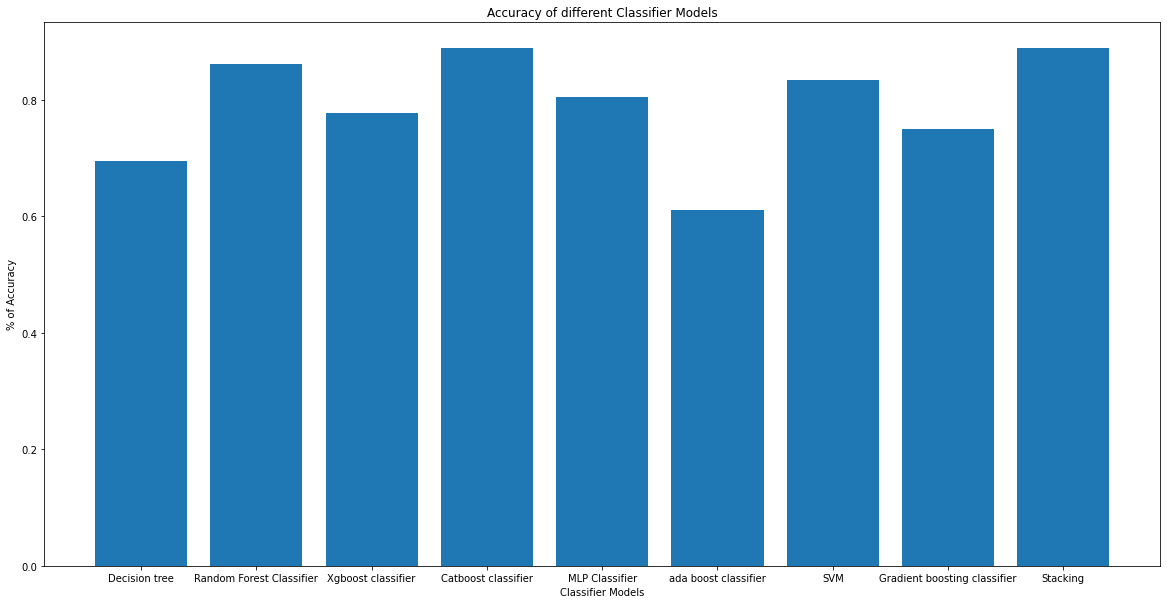

In [53]:
model_list = ['Decision tree','Random Forest Classifier','Xgboost classifier','Catboost classifier','MLP Classifier', 
              'ada boost classifier','SVM','Gradient boosting classifier','Stacking']
fig = plt.figure(figsize = (20,10))
plt.bar(model_list,accuracy)
plt.title('Accuracy of different Classifier Models')
plt.xlabel('Classifier Models')
plt.ylabel('% of Accuracy')

plt.show()